<a href="https://colab.research.google.com/github/sardarmonsoorsait/cnnproject_mnist/blob/master/cnnproject_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as df 

In [5]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

#Load Dataset from Keras Datasets

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train[12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train[12]

5

In [9]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#Show the image corespond to the y value

Text(0.5, 1.0, 'Sandal')

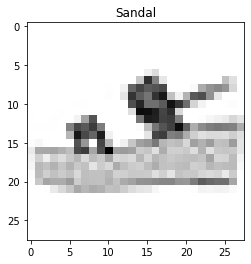

In [10]:
plt.imshow(X_train[12],cmap="Greys")
plt.title(class_labels[y_train[12]])

###show 10 images randomly with label name

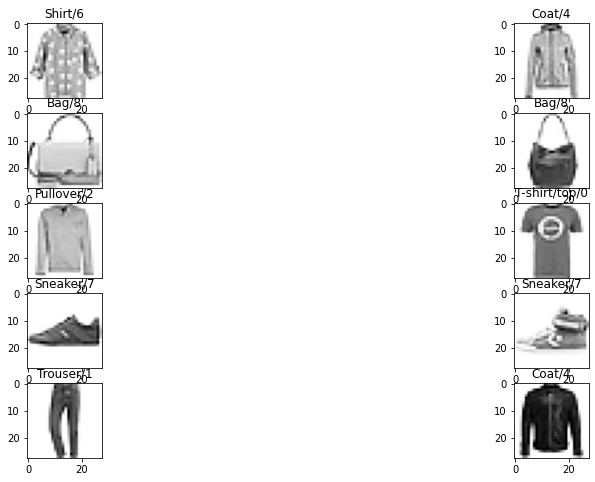

In [11]:
j=1
plt.figure(figsize=(16,8))
for i in np.random.randint(0,1000,10):
  plt.subplot(5,2,j)
  j+=1
 # plt.figure(figsize=(16,8))
  plt.imshow(X_train[i],cmap="Greys")
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))


In [12]:
X_train.ndim

3

conv2d needs 4 dimensions our data have 3 dimensions so we need to convert our data to 4 dimensions 

In [13]:
X_train = np.expand_dims(X_train,-1)

In [14]:
X_train.ndim

4

In [15]:
#Feature scaling
X_train = X_train/255
X_test = X_test/255

train test split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [17]:
pip install tensorflow 1.0

ERROR: Could not find a version that satisfies the requirement 1.0 (from versions: none)
ERROR: No matching distribution found for 1.0


# New Section

In [34]:
from keras.layers import Conv2D, MaxPooling2D
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,strides=(1,1),padding='valid',input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128,activation='relu'),
                                 keras.layers.Dense(units=10,activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train,epochs=10,batch_size=512,validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 18s 193ms/step - loss: 0.6401 - accuracy: 0.7838 - val_loss: 0.4183 - val_accuracy: 0.8529
Epoch 2/10
94/94 [==============================] - 18s 194ms/step - loss: 0.3918 - accuracy: 0.8639 - val_loss: 0.3778 - val_accuracy: 0.8637
Epoch 3/10
94/94 [==============================] - 18s 194ms/step - loss: 0.3454 - accuracy: 0.8790 - val_loss: 0.3248 - val_accuracy: 0.8863
Epoch 4/10
94/94 [==============================] - 18s 193ms/step - loss: 0.3152 - accuracy: 0.8898 - val_loss: 0.3114 - val_accuracy: 0.8908
Epoch 5/10
94/94 [==============================] - 18s 193ms/step - loss: 0.2956 - accuracy: 0.8969 - val_loss: 0.2940 - val_accuracy: 0.8958
Epoch 6/10
94/94 [==============================] - 18s 194ms/step - loss: 0.2754 - accuracy: 0.9027 - val_loss: 0.2951 - val_accuracy: 0.8948
Epoch 7/10
94/94 [==============================] - 18s 194ms/step - loss: 0.2600 - accuracy: 0.9071 - val_loss: 0.2788 - val_accuracy: 0.9038

In [40]:
X_test= np.expand_dims(X_test,-1)
prediction = model.predict(X_test)
prediction.round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.7 , 0.02, 0.01]], dtype=float32)

In [41]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2791 - accuracy: 0.9002


[0.2791457772254944, 0.9002000093460083]

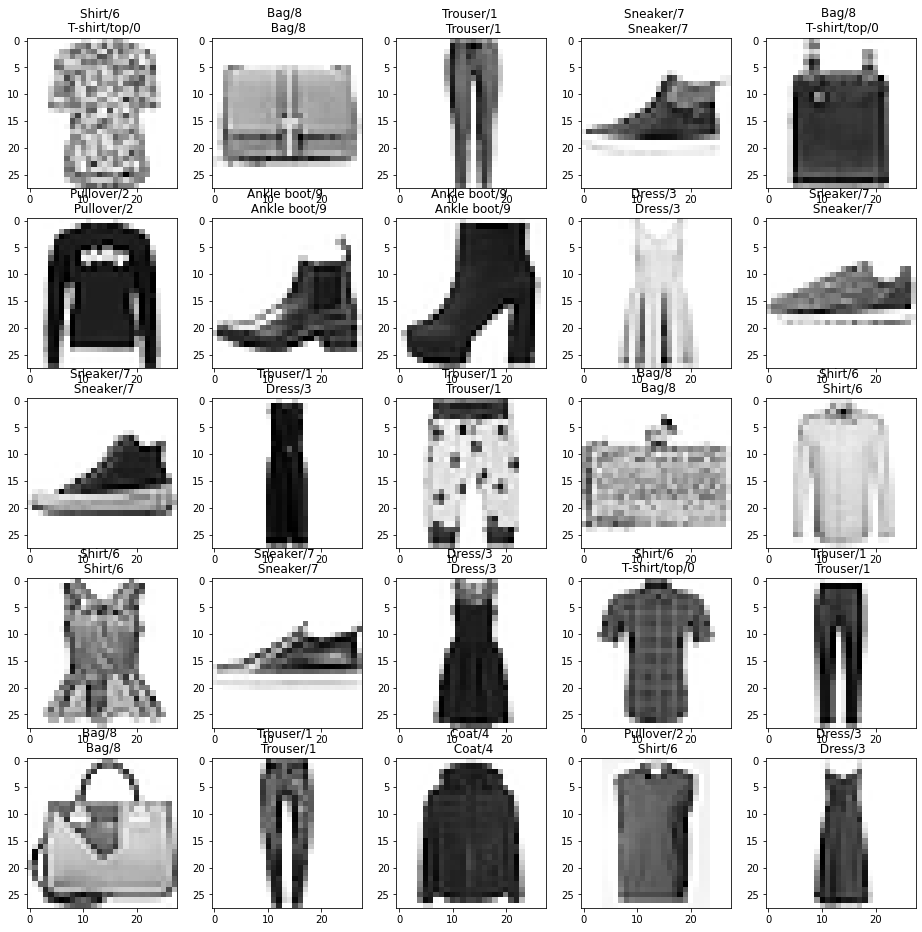

In [49]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('{}/{} \n {}/{}' .format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(prediction[i])],np.argmax(prediction[i])))




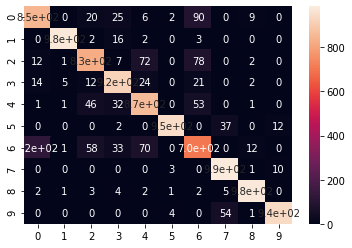

In [55]:
#cofusion matrics
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,[np.argmax(label).round(2) for label in prediction])
sns.heatmap(cm,annot=True)

In [58]:
cr = classification_report(y_test,[np.argmax(label) for label in prediction],target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.83      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.83      0.87      0.85      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.91      0.99      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

